In [21]:
# Download the dataset
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

# Create a directory and extract the dataset
!mkdir speech_commands && tar -xvzf speech_commands_v0.01.tar.gz -C speech_commands

--2025-04-03 23:53:13--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.196.207, 74.125.134.207, 74.125.139.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.196.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz.2’

speech_commands_v0. 100%[===================>]   1.39G   181MB/s    in 6.7s    

2025-04-03 23:53:20 (210 MB/s) - ‘speech_commands_v0.01.tar.gz.2’ saved [1489096277/1489096277]

mkdir: cannot create directory ‘speech_commands’: File exists


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
import tqdm.notebook as tqdm
from collections import Counter
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [23]:
import os
# Path to dataset
data_path = "speech_commands"

# Count number of audio files
num_files = sum([len(files) for _, _, files in os.walk(data_path)])

print("Total number of rows (audio files):", num_files)

Total number of rows (audio files): 64732


In [24]:
print(len(data_path))
print(num_files)

15
64732


  0%|          | 0/1000 [00:00<?, ?it/s]

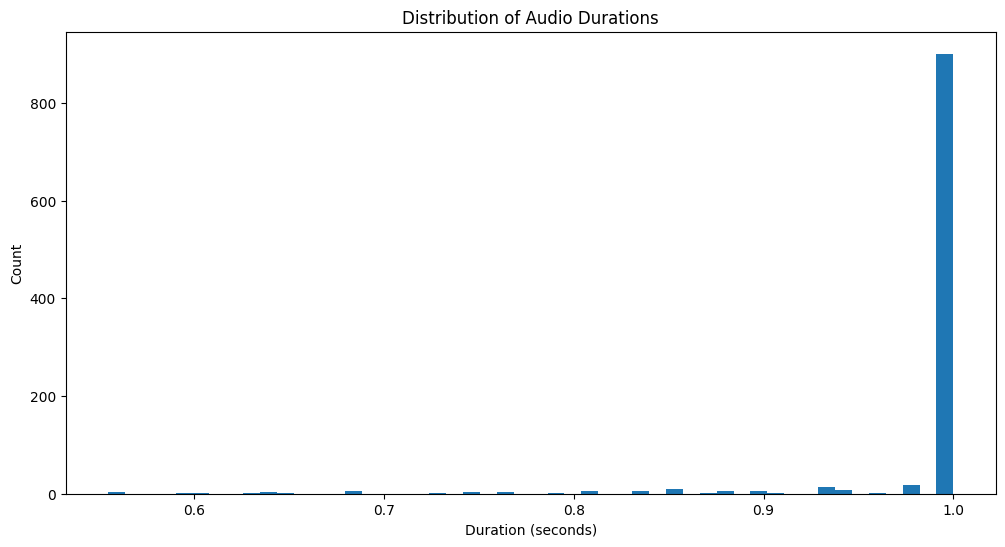


Min duration: 0.5547 seconds
Max duration: 1.0000 seconds
Mean duration: 0.9853 seconds
Duration std dev: 0.0579 seconds


In [25]:
# 3. Audio duration analysis
# Get all .wav files
wav_files = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('.wav'):
            wav_files.append(os.path.join(root, file))

# Sample a subset for speed (adjust as needed)
sample_size = 1000
if len(wav_files) > sample_size:
    wav_files = np.random.choice(wav_files, sample_size, replace=False)

durations = []
for wav_file in tqdm(wav_files):
    # Load audio file
    audio, sr = librosa.load(wav_file, sr=None)
    duration = len(audio) / sr
    durations.append(duration)

plt.figure(figsize=(12, 6))
plt.hist(durations, bins=50)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

print(f"\nMin duration: {min(durations):.4f} seconds")
print(f"Max duration: {max(durations):.4f} seconds")
print(f"Mean duration: {np.mean(durations):.4f} seconds")
print(f"Duration std dev: {np.std(durations):.4f} seconds")


--- Analyzing command: 'yes' ---


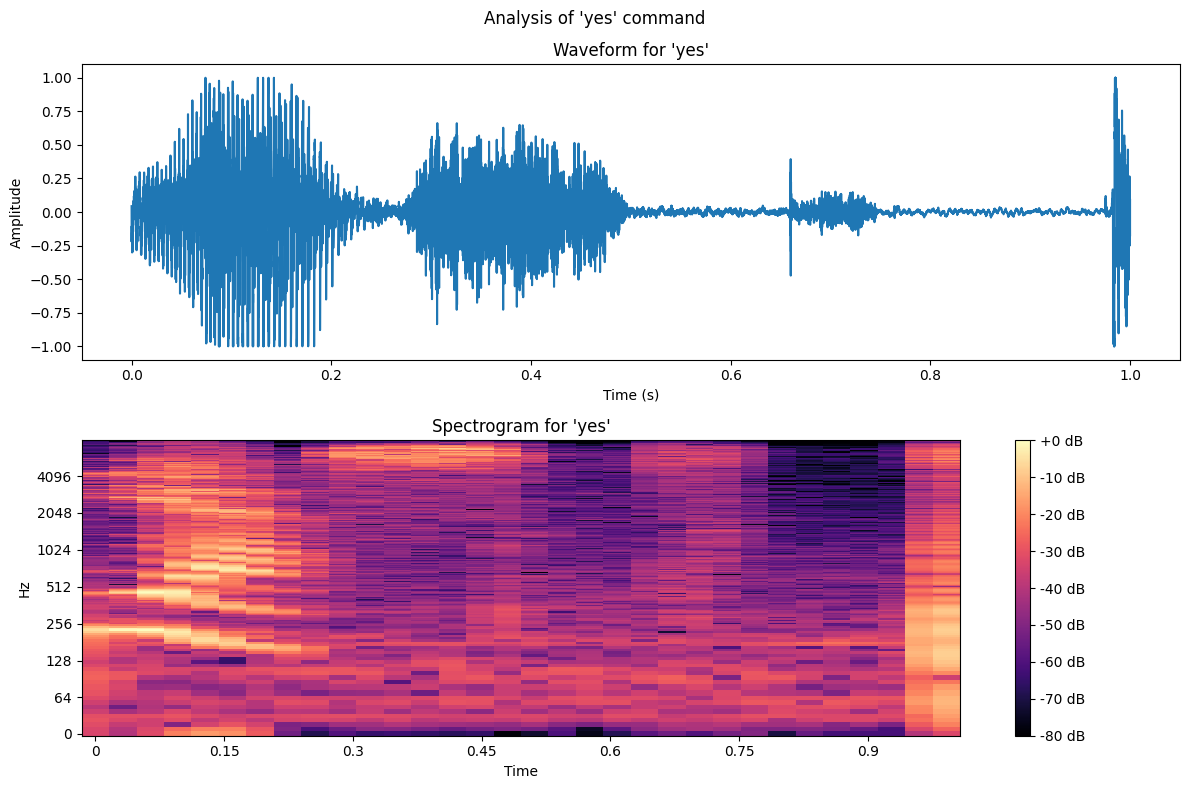


--- Analyzing command: 'no' ---


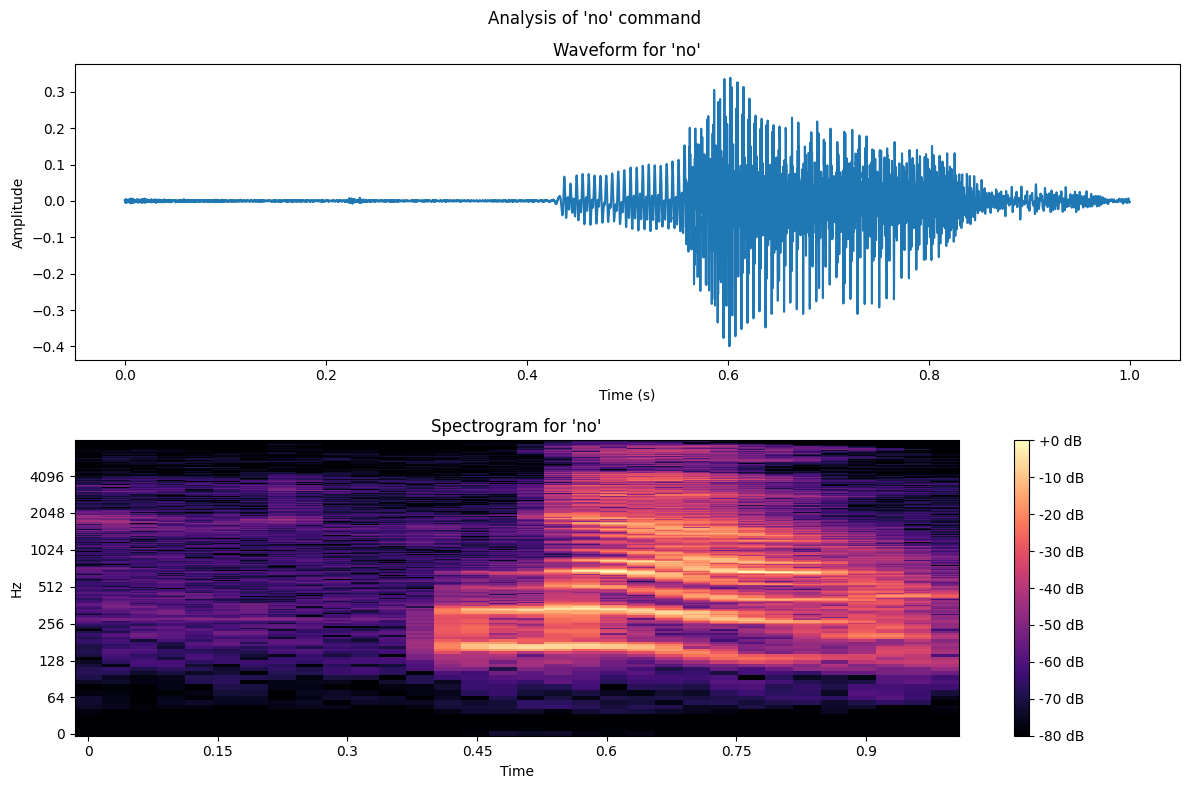


--- Analyzing command: 'up' ---


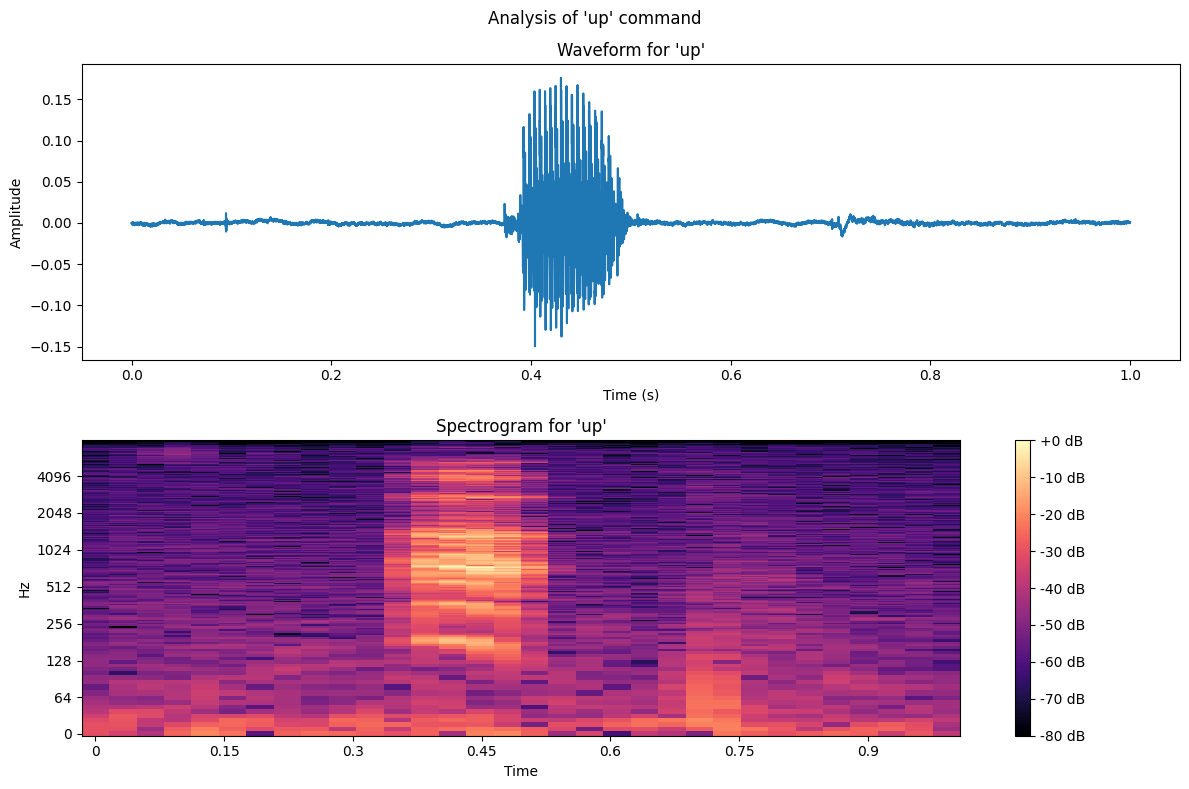


--- Analyzing command: 'down' ---


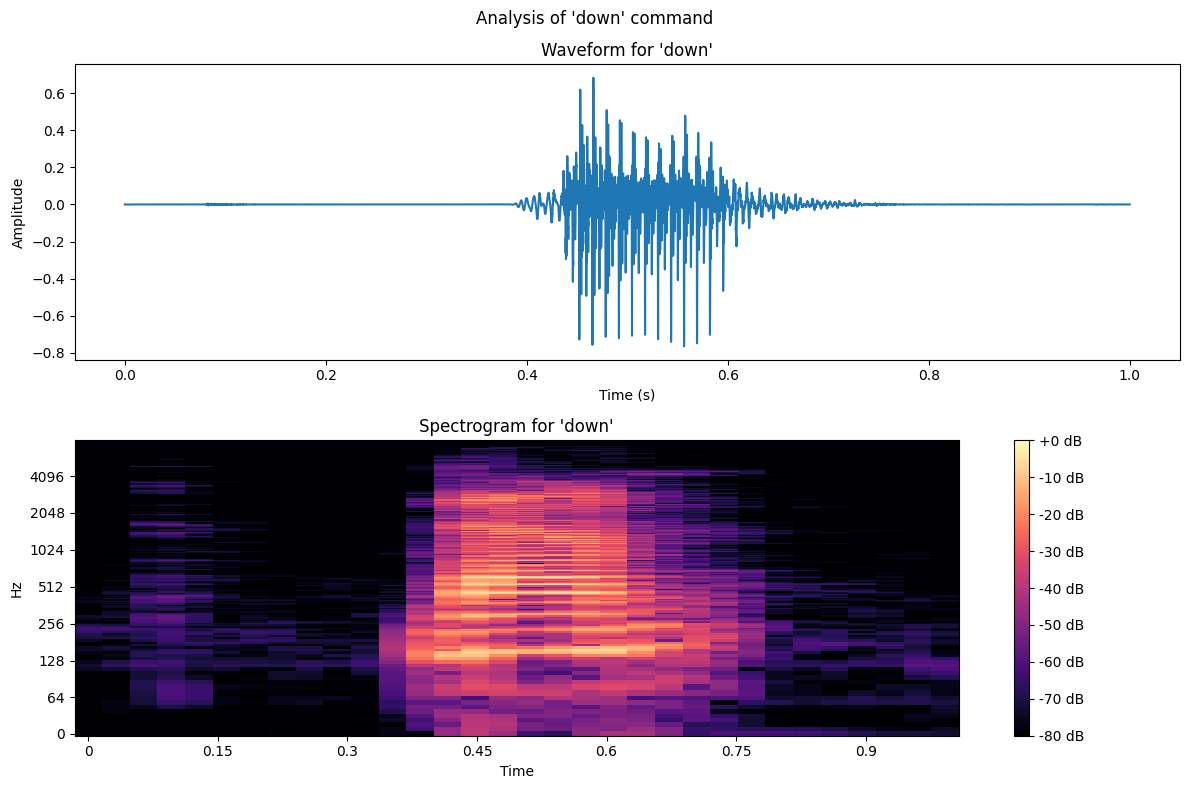

In [26]:
# 5. Compare spectrograms across different commands
import random
from IPython.display import Audio
# Commands to compare
commands_to_compare = ['yes', 'no', 'up', 'down']

def plot_spectrogram(audio_path, title=None):
    # Load audio
    audio, sr = librosa.load(audio_path, sr=None)
    label = os.path.basename(os.path.dirname(audio_path))

    plt.figure(figsize=(12, 8))

    # Plot waveform
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(audio))/sr, audio)
    plt.title(f"Waveform for '{label}'")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram for '{label}'")

    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    # Play the audio
    return Audio(audio, rate=sr)

# Find example files for each command
for cmd in commands_to_compare:
    cmd_dir = os.path.join(data_path, cmd)
    if os.path.exists(cmd_dir):
        # Get list of all wav files for this command
        cmd_files = [os.path.join(cmd_dir, f) for f in os.listdir(cmd_dir)
                    if f.endswith('.wav')]

        if cmd_files:
            # Choose a random example
            example_file = random.choice(cmd_files)
            print(f"\n--- Analyzing command: '{cmd}' ---")
            audio_player = plot_spectrogram(example_file, f"Analysis of '{cmd}' command")
            display(audio_player)

Available commands in the dataset: ['nine', 'up', 'eight', 'tree', 'sheila', 'six', 'seven', 'left', 'down', 'zero', 'marvin', 'on', 'five', 'one', 'bird', 'yes', 'happy', 'cat', 'wow', 'off', 'three', 'stop', 'no', 'right', 'four', 'go', 'dog', 'house', 'bed', 'two']

--- Analyzing command: 'go' ---


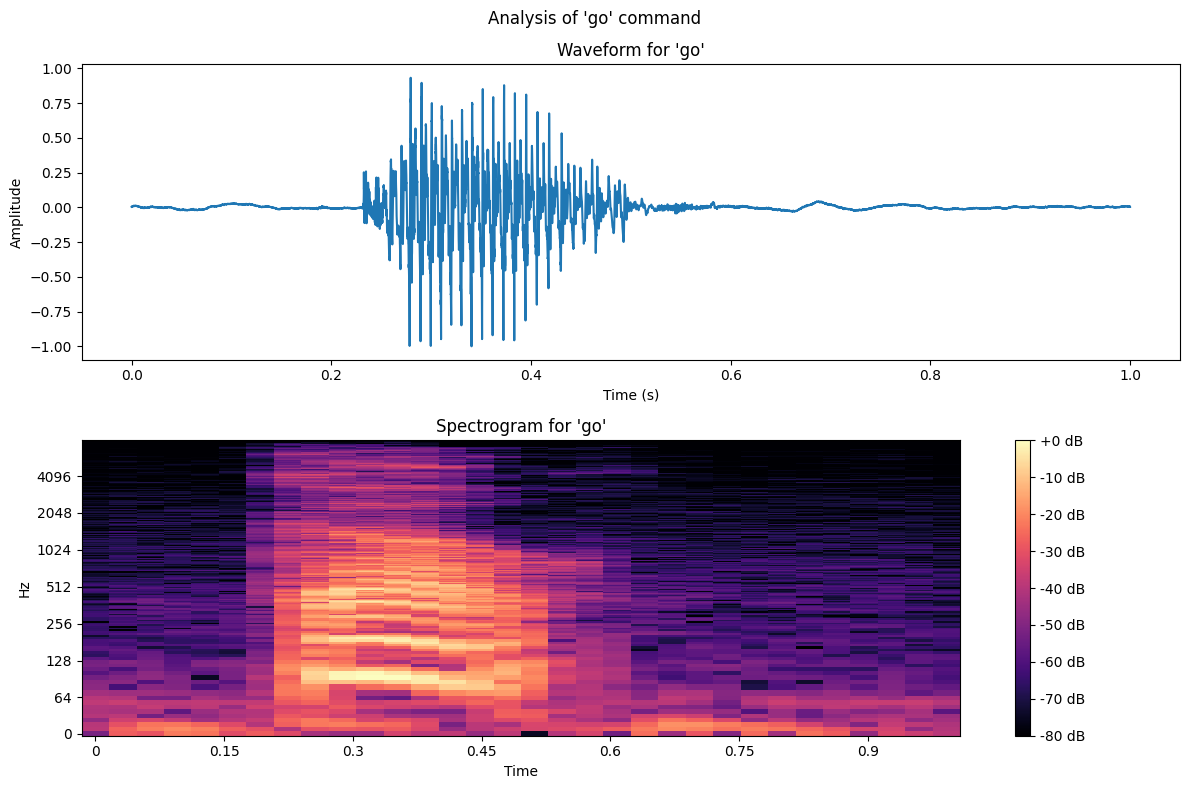


--- Analyzing command: 'right' ---


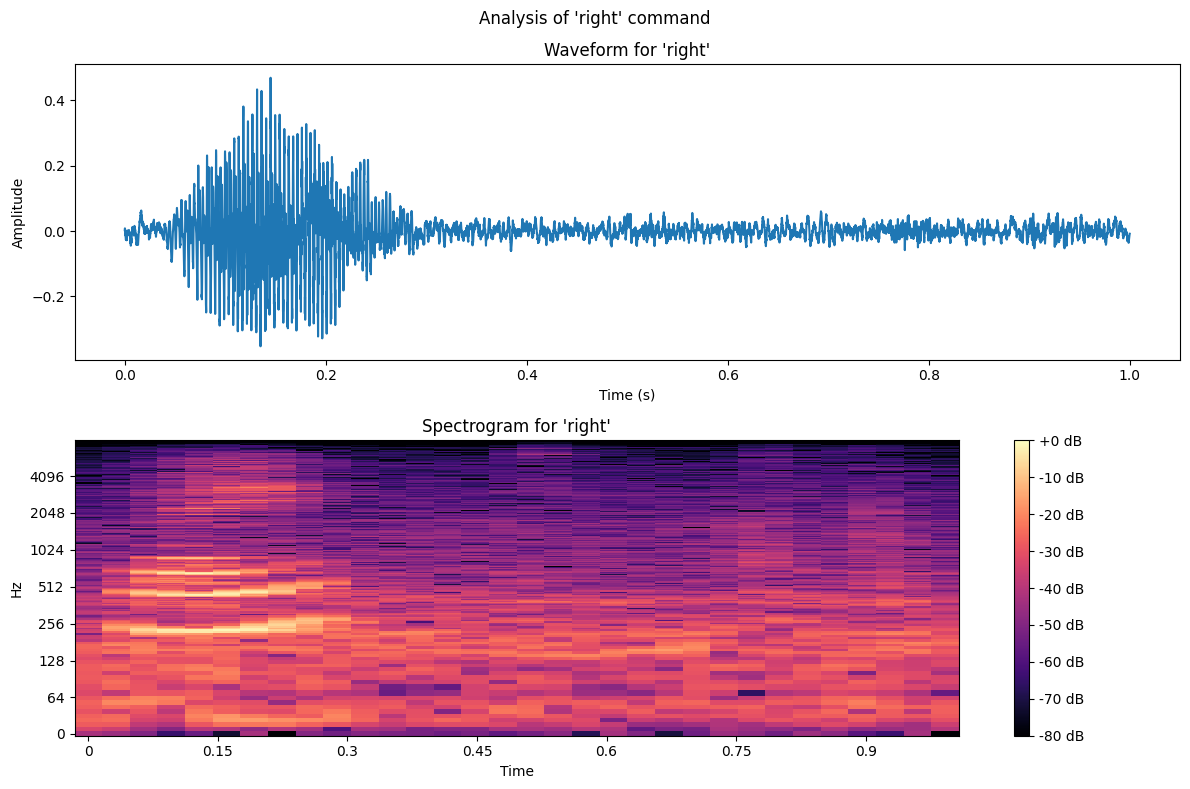


--- Analyzing command: 'left' ---


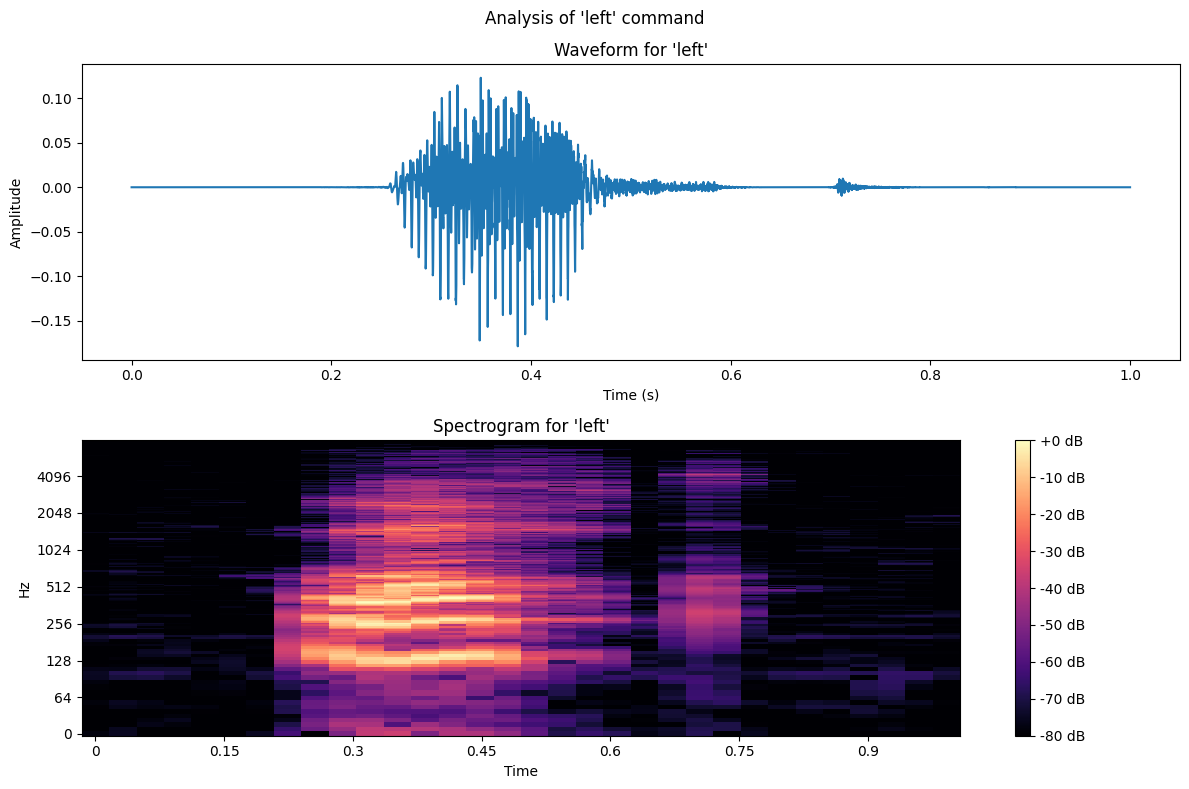


--- Analyzing command: 'zero' ---


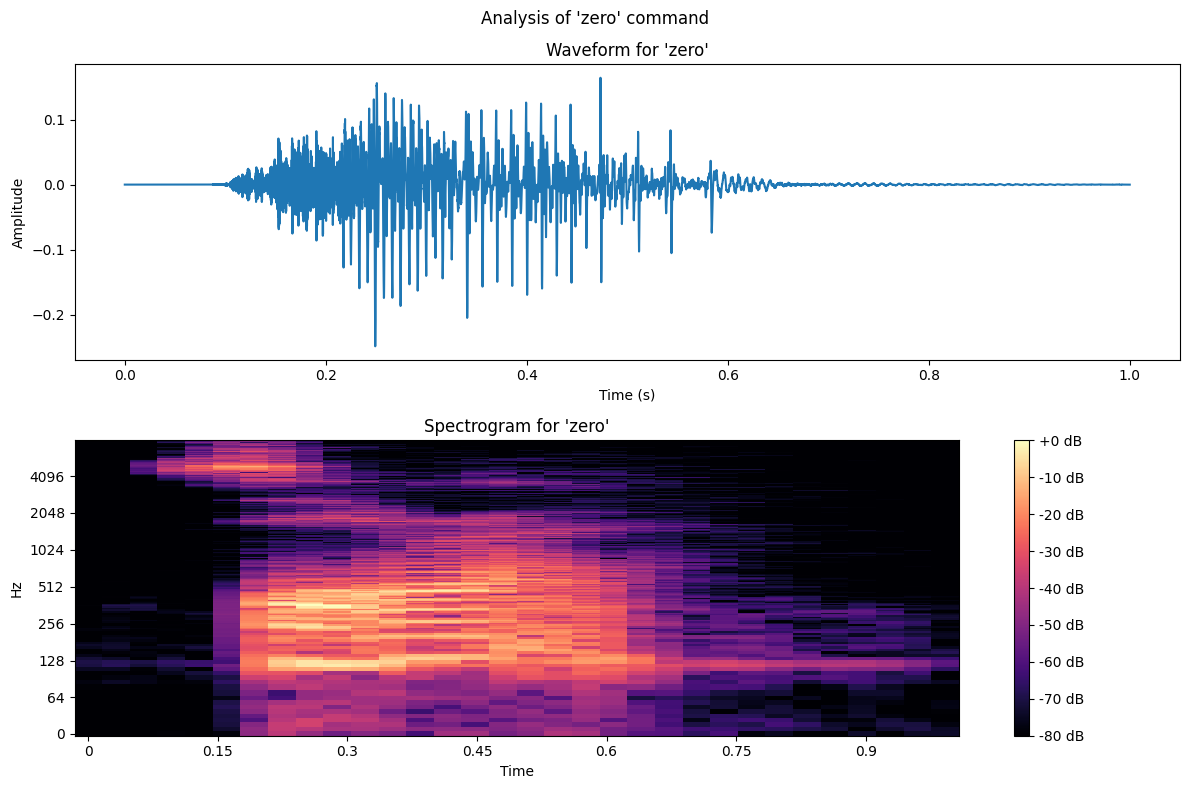


--- Analyzing command: 'two' ---


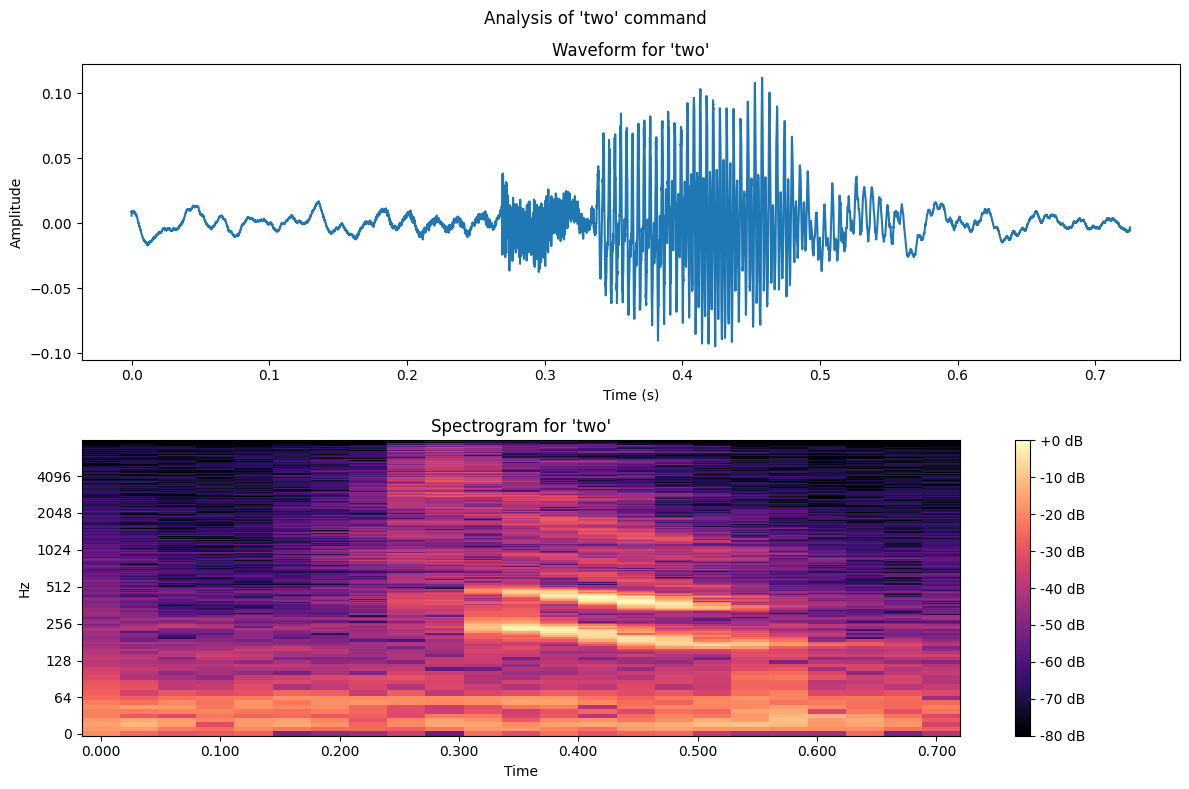


--- Analyzing command: 'one' ---


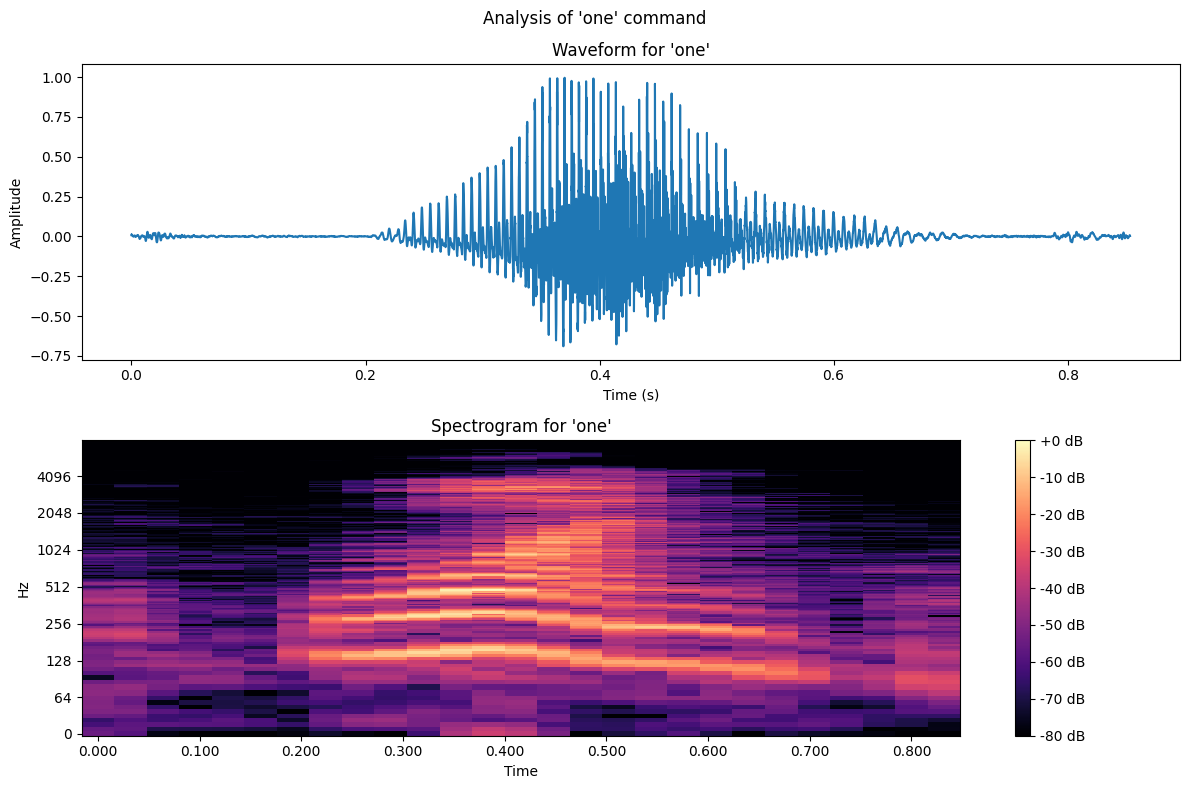


--- Analyzing command: 'dog' ---


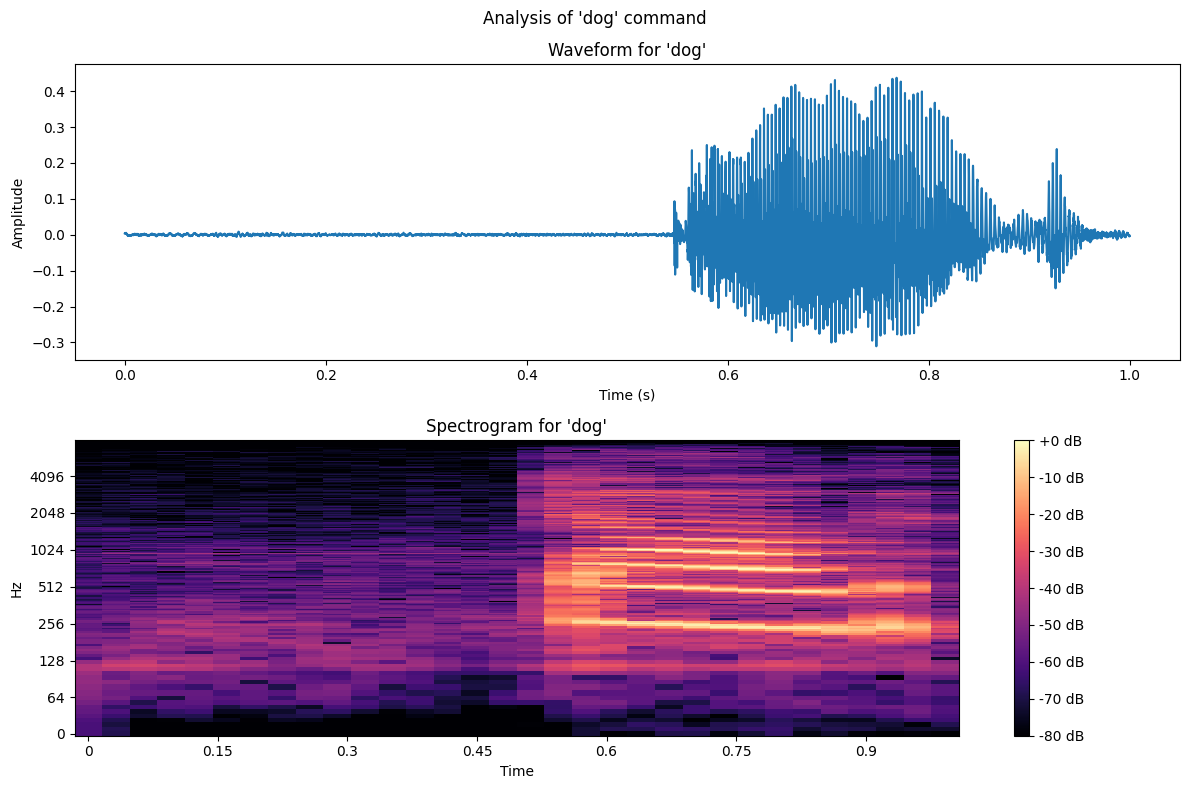


--- Analyzing command: 'bird' ---


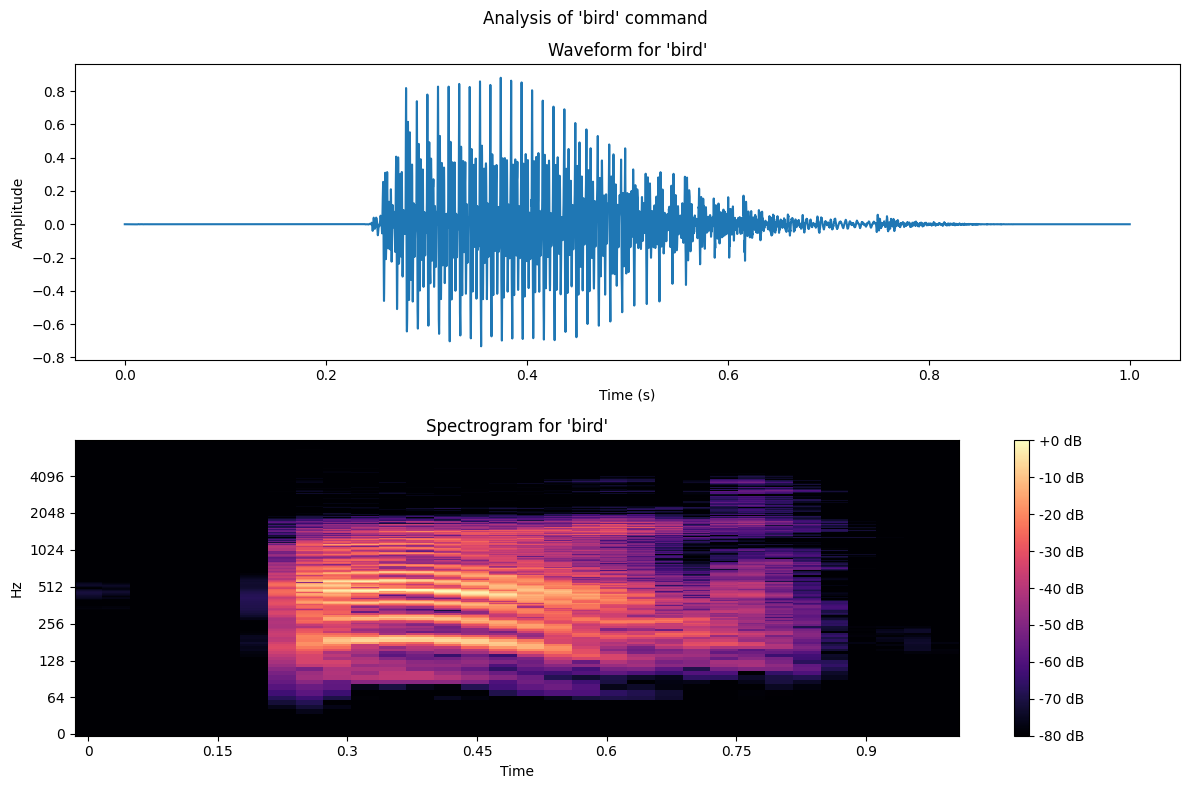


--- Analyzing command: 'house' ---


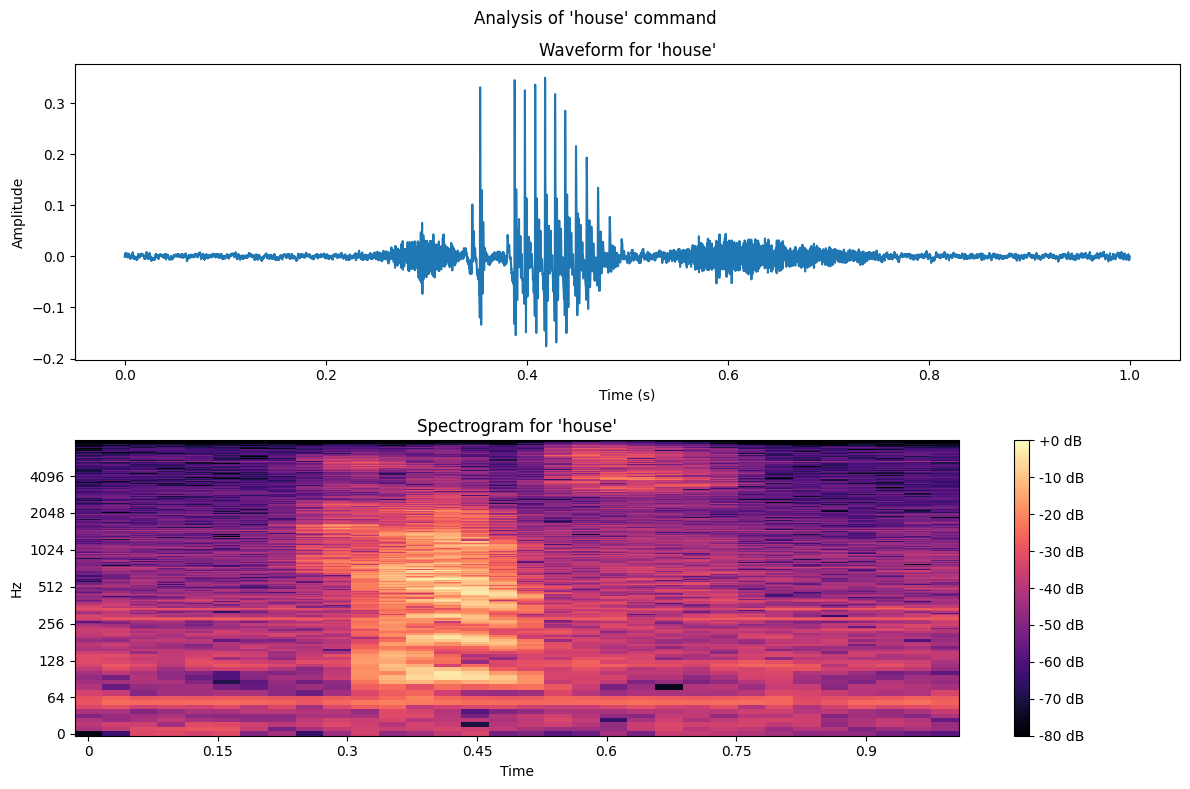

In [27]:
# 5. Spectrograms for diverse command samples
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import random

# Path to dataset
data_path = "speech_commands"

# Get all command categories (folders)
commands = [d for d in os.listdir(data_path)
            if os.path.isdir(os.path.join(data_path, d))
            and not d.startswith('_')]

print(f"Available commands in the dataset: {commands}")

# Select a diverse sample of commands (core commands and others)
core_commands = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
digit_commands = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
other_commands = [cmd for cmd in commands if cmd not in core_commands and cmd not in digit_commands]

# Create a diverse sample
sample_commands = []
sample_commands.extend(random.sample(core_commands, min(3, len(core_commands))))
sample_commands.extend(random.sample(digit_commands, min(3, len(digit_commands))))
sample_commands.extend(random.sample(other_commands, min(3, len(other_commands))))

def plot_spectrogram(audio_path, title=None):
    # Load audio
    audio, sr = librosa.load(audio_path, sr=None)
    label = os.path.basename(os.path.dirname(audio_path))

    plt.figure(figsize=(12, 8))

    # Plot waveform
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(audio))/sr, audio)
    plt.title(f"Waveform for '{label}'")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram for '{label}'")

    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    # Play the audio
    return Audio(audio, rate=sr)

# Find example files for each command in our sample
for cmd in sample_commands:
    cmd_dir = os.path.join(data_path, cmd)
    if os.path.exists(cmd_dir):
        # Get list of all wav files for this command
        cmd_files = [os.path.join(cmd_dir, f) for f in os.listdir(cmd_dir)
                    if f.endswith('.wav')]

        if cmd_files:
            # Choose a random example
            example_file = random.choice(cmd_files)
            print(f"\n--- Analyzing command: '{cmd}' ---")
            audio_player = plot_spectrogram(example_file, f"Analysis of '{cmd}' command")
            display(audio_player)

In [28]:
def extract_features(file_path, sr=16000, n_mfcc=13, max_pad_len=160):
    import librosa
    import numpy as np
    # Load audio file
    audio, sr = librosa.load(file_path, sr=sr)
    # Compute MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    # Pad or truncate the MFCCs to have the same time steps
    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc


In [29]:
import os
import numpy as np
from tqdm.notebook import tqdm
import glob

data_path = "speech_commands"
labels = [d for d in os.listdir(data_path)
          if os.path.isdir(os.path.join(data_path, d)) and not d.startswith('_')]
print("Labels (commands):", labels)

# Create a mapping from label to an index
label_to_index = {label: idx for idx, label in enumerate(labels)}

X = []  # feature list
y = []  # label list

# Loop over each label directory
for label in labels:
    file_list = glob.glob(os.path.join(data_path, label, '*.wav'))
    for file in tqdm(file_list, desc=f"Processing {label}"):
        mfcc = extract_features(file)
        X.append(mfcc)
        y.append(label_to_index[label])

X = np.array(X)  # shape: (samples, n_mfcc, time_steps)
y = np.array(y)
print("Feature array shape:", X.shape)


Labels (commands): ['nine', 'up', 'eight', 'tree', 'sheila', 'six', 'seven', 'left', 'down', 'zero', 'marvin', 'on', 'five', 'one', 'bird', 'yes', 'happy', 'cat', 'wow', 'off', 'three', 'stop', 'no', 'right', 'four', 'go', 'dog', 'house', 'bed', 'two']


Processing nine:   0%|          | 0/2364 [00:00<?, ?it/s]

Processing up:   0%|          | 0/2375 [00:00<?, ?it/s]

Processing eight:   0%|          | 0/2352 [00:00<?, ?it/s]

Processing tree:   0%|          | 0/1733 [00:00<?, ?it/s]

Processing sheila:   0%|          | 0/1734 [00:00<?, ?it/s]

Processing six:   0%|          | 0/2369 [00:00<?, ?it/s]

Processing seven:   0%|          | 0/2377 [00:00<?, ?it/s]

Processing left:   0%|          | 0/2353 [00:00<?, ?it/s]

Processing down:   0%|          | 0/2359 [00:00<?, ?it/s]

Processing zero:   0%|          | 0/2376 [00:00<?, ?it/s]

Processing marvin:   0%|          | 0/1746 [00:00<?, ?it/s]

Processing on:   0%|          | 0/2367 [00:00<?, ?it/s]

Processing five:   0%|          | 0/2357 [00:00<?, ?it/s]

Processing one:   0%|          | 0/2370 [00:00<?, ?it/s]

Processing bird:   0%|          | 0/1731 [00:00<?, ?it/s]

Processing yes:   0%|          | 0/2377 [00:00<?, ?it/s]

Processing happy:   0%|          | 0/1742 [00:00<?, ?it/s]

Processing cat:   0%|          | 0/1733 [00:00<?, ?it/s]

Processing wow:   0%|          | 0/1745 [00:00<?, ?it/s]

Processing off:   0%|          | 0/2357 [00:00<?, ?it/s]

Processing three:   0%|          | 0/2356 [00:00<?, ?it/s]

Processing stop:   0%|          | 0/2380 [00:00<?, ?it/s]

Processing no:   0%|          | 0/2375 [00:00<?, ?it/s]

Processing right:   0%|          | 0/2367 [00:00<?, ?it/s]

Processing four:   0%|          | 0/2372 [00:00<?, ?it/s]

Processing go:   0%|          | 0/2372 [00:00<?, ?it/s]

Processing dog:   0%|          | 0/1746 [00:00<?, ?it/s]

Processing house:   0%|          | 0/1750 [00:00<?, ?it/s]

Processing bed:   0%|          | 0/1713 [00:00<?, ?it/s]

Processing two:   0%|          | 0/2373 [00:00<?, ?it/s]

Feature array shape: (64721, 13, 160)


In [29]:
X = np.transpose(X, (0, 2, 1))
print("After transpose, shape:", X.shape)  # Expected: (samples, time_steps, n_mfcc)


In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split into training and testing sets (e.g., 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(labels)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define input shape based on preprocessed features
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, n_mfcc)

model = Sequential([
    LSTM(128, input_shape=input_shape, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 13, 128)             │         147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,486 (794.87 KB)

 Trainable params: 203,486 (794.87 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


Epoch 1/30
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.0952 - loss: 3.1906 - val_accuracy: 0.2860 - val_loss: 2.4290
Epoch 2/30
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 48s 33ms/step - accuracy: 0.2968 - loss: 2.3781 - val_accuracy: 0.4040 - val_loss: 1.9839
Epoch 3/30
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.4076 - loss: 1.9912 - val_accuracy: 0.4900 - val_loss: 1.6860
Epoch 4/30
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.4734 - loss: 1.7487 - val_accuracy: 0.5440 - val_loss: 1.5112
Epoch 5/30
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.5206 - loss: 1.5815 - val_accuracy: 0.5786 - val_loss: 1.4017
Epoch 6/30
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.5551 - loss: 1.4585 - val_accuracy: 0.6078 - val_loss: 1.2962
Epoch 7/30
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.5875 - loss: 1.3583 - val_accuracy: 0.6273 - val_loss: 1.2492
Epoch 8/30
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.6090 -

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7471 - loss: 0.8318
Test Accuracy: 74.98%


In [34]:
model.save('speech_commands_lstm_model.h5')


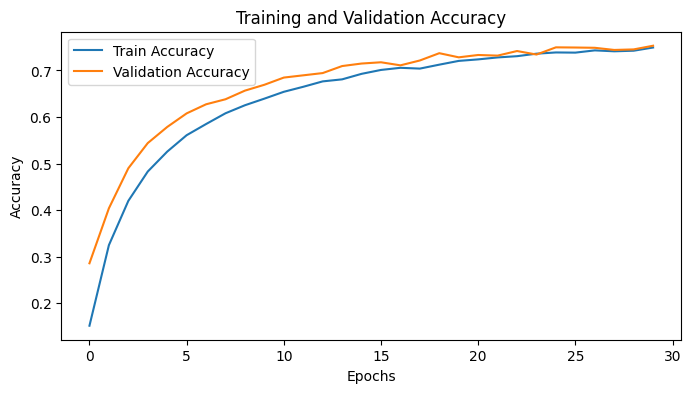

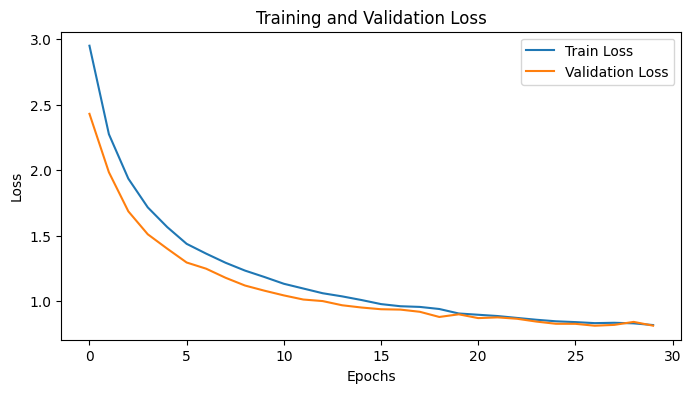

In [35]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


405/405 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


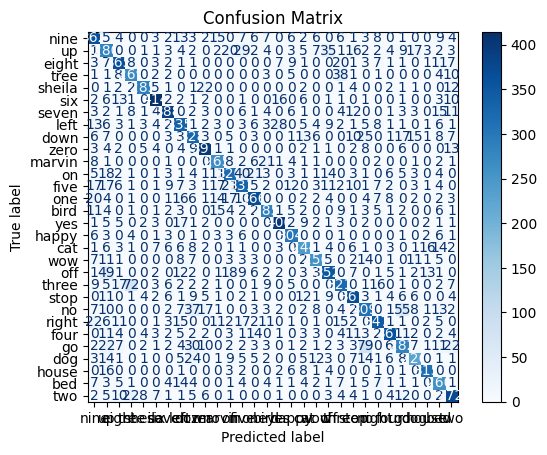

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predicted classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [37]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Get predicted classes if not already computed
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the classification report (includes precision, recall, F1-score for each class)
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

# Calculate additional metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("Overall Evaluation Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")


405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step
Classification Report:
              precision    recall  f1-score   support

        nine       0.69      0.76      0.73       475
          up       0.52      0.61      0.56       458
       eight       0.77      0.80      0.78       459
        tree       0.68      0.78      0.73       345
      sheila       0.90      0.83      0.87       342
         six       0.88      0.86      0.87       483
       seven       0.85      0.81      0.83       479
        left       0.69      0.73      0.71       457
        down       0.67      0.71      0.69       462
        zero       0.83      0.86      0.84       463
      marvin       0.73      0.82      0.77       325
          on       0.72      0.68      0.70       472
        five       0.69      0.67      0.68       494
         one       0.80      0.75      0.77       490
        bird       0.78      0.78      0.78       366
         yes       0.86      0.87      0.87       459
       happy   